In [2]:
import seaborn as sns
import re
import matplotlib.pyplot as plt
from datetime import datetime
import math
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None 
%matplotlib inline
sns.set()

In [3]:
survey = pd.read_csv('data/survey_clean.csv')

In [4]:
survey.head()

,Source,TimeFinished,"On a scale of 1 to 10, how reasonable do you think the public reaction is to COVID-19 now? (1 is under-reacting and 10 is overreacting)","On a scale of 1 to 10, how much do you trust the government to respond to COVID-19 effectively? (1 is strongly distrust and 10 is strongly trust)","""COVID-19 has led me to drastically change my daily routines and the way I spend my day."" How much do you agree or disagree with this statement?",How many WEEKS do you think it'll take before your daily life returns to normal (like before COVID-19)?,"How are you doing financially today, compared to a year ago?","Over the past week, have you been continually worried or anxious about a number of events or activities in your daily life?","In the past 3 days, did you work from home (WFH)?","In the past 48 hours, I attended in-person gatherings of 50+ people","In the past 48 hours, I attended in-person gatherings outside of my household","In the past 48 hours, I rescheduled or canceled non-critical in-person gatherings and appointments (e.g. birthday parties, concerts, museums, annual checkups, spa, social dinners)","In the past 48 hours, I rescheduled or canceled pre-arranged travel plans","In the past 48 hours, I increased frequency of hand washing with soap","In the past 48 hours, I cleaned surfaces with disinfecting wipes or sprays","In the past 48 hours, I made an effort to avoid touching my eyes, nose and mouth","In the past 48 hours, I maintained 3 feet distance between myself and other people outside of my household","In the past 48 hours, I did not leave my home for non-critical needs","In the past 48 hours, I ate at a restaurant",Is any of your loved ones at higher risk of COVID-19? I don't know,"Is any of your loved ones at higher risk of COVID-19? Yes, they live in areas affected by COVID-19 (parts of the USA, China, Italy, Korea, etc)","Is any of your loved ones at higher risk of COVID-19? Yes, due to existing medical conditions (Diabetes, heart disease, lung disease)","Is any of your loved ones at higher risk of COVID-19? Yes, due to their age (60+)",Gender,Income,Age,Zipcode,Country,Employment status,Ethnicity,Industry,Age group,Female,Male,Student,Retired
0,Pollfish1,2020-03-16,3,3,Agree,24,NaN,NaN,I worked from home for some days,False,False,False,True,True,True,True,False,True,False,False,False,True,True,Female,"Between $\$$25,000 and $\$$49,999",26,94114,USA,NaN,Caucasian,Other,"(24, 39]",1,0,0,0
1,Pollfish1,2020-03-16,7,7,Agree,20,NaN,NaN,"No, for other reasons",False,False,False,False,False,False,False,False,True,False,False,False,False,False,Female,"Less than $\$$25,000",37,95117,USA,NaN,Black,Homemaker,"(24, 39]",1,0,0,0
2,Pollfish1,2020-03-16,3,1,Strongly agree,10,NaN,NaN,"Yes, my employer/school made WFH mandatory",False,False,True,True,True,True,True,True,True,False,False,True,True,False,Female,Prefer not to say,18,94536,USA,NaN,Hispanic,Construction,"(0, 24]",1,0,0,0
3,Pollfish1,2020-03-16,5,9,Agree,8,NaN,NaN,I worked from home for some days,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Female,"Less than $\$$25,000",70,94043,USA,NaN,Caucasian,Education,"(54, 70]",1,0,0,0
4,Pollfish1,2020-03-16,3,5,Disagree,3,NaN,NaN,"No, for other reasons",False,False,False,False,True,True,False,True,True,False,False,False,True,True,Male,"Between $\$$25,000 and $\$$49,999",64,95141,USA,NaN,Caucasian,Military,"(54, 70]",0,1,0,0


# Number of responses

Text(0.5, 1.0, 'Survey Responses by Date')

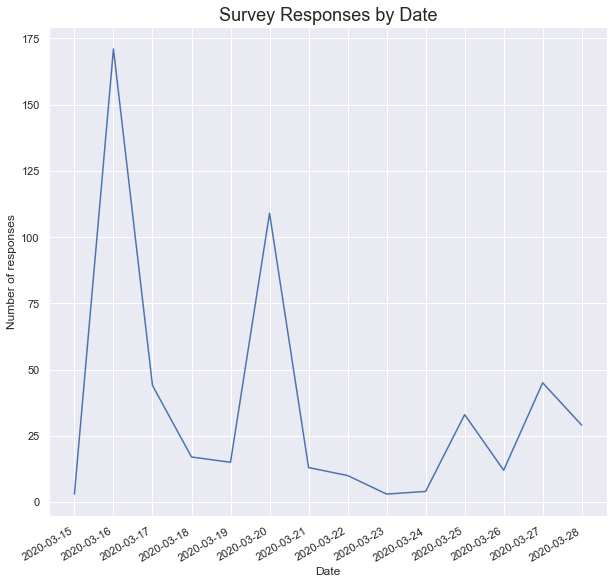

In [94]:
num_responses = survey.groupby(['TimeFinished']).count()[['Source']].rename(columns={'Source': 'Count'}).reset_index()

fig, ax = plt.subplots(1, figsize=(10,10))
ax.plot(num_responses['TimeFinished'],num_responses['Count'])
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Number of responses')
plt.title('Survey Responses by Date', fontsize=18)

# Number of responses by country

Text(0.5, 1.0, 'Survey Responses by Date')

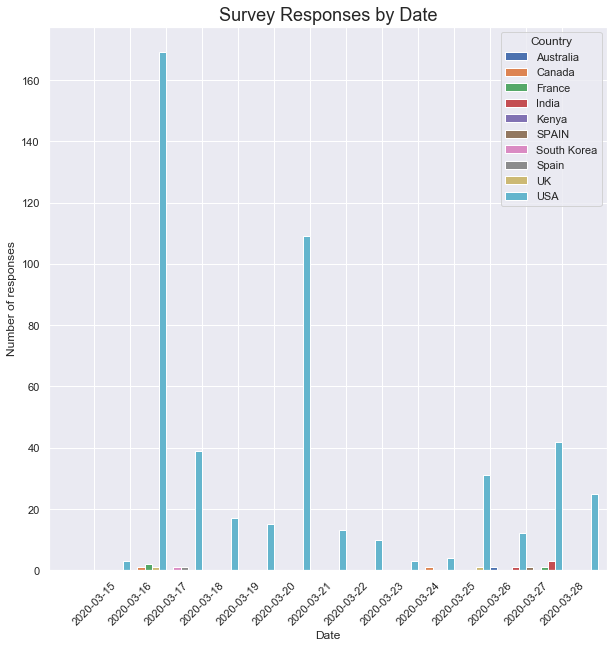

In [95]:
fig, ax = plt.subplots(figsize=(10,10))
survey.groupby(['TimeFinished','Country']).count()['Source'].unstack().plot.bar(ax=ax, width=2, rot=45)
plt.xlabel('Date')
plt.ylabel('Number of responses')
plt.title('Survey Responses by Date', fontsize=18)

# How reasonable do you think the public reaction is to COVID-19 now?

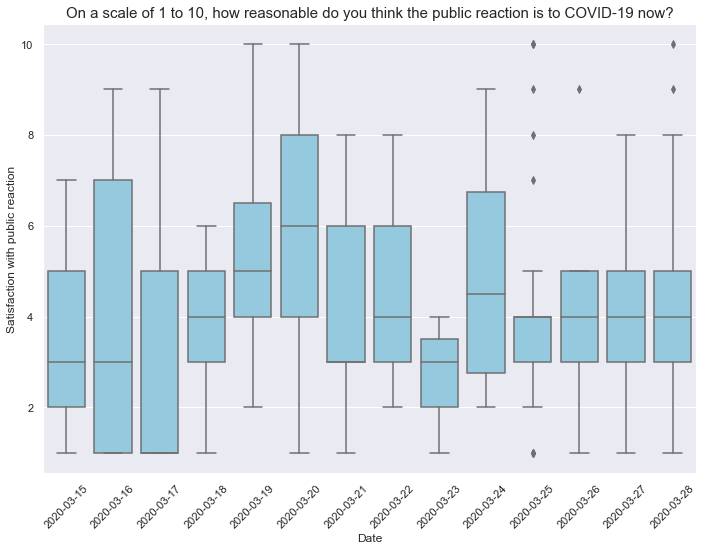

In [97]:
with sns.axes_style(style='ticks'):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    g = sns.boxplot("TimeFinished", 
                    "On a scale of 1 to 10, how reasonable do you think the public reaction is to COVID-19 now? (1 is under-reacting and 10 is overreacting)", 
                    color="skyblue", data=survey.sort_values(by=['TimeFinished']))
    g.set(xlabel='Date', ylabel='Satisfaction with public reaction')
    g.set_title('On a scale of 1 to 10, how reasonable do you think the public reaction is to COVID-19 now?', fontsize=15)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)   

# How reasonable do you think the public reaction is to COVID-19 now? (by country)

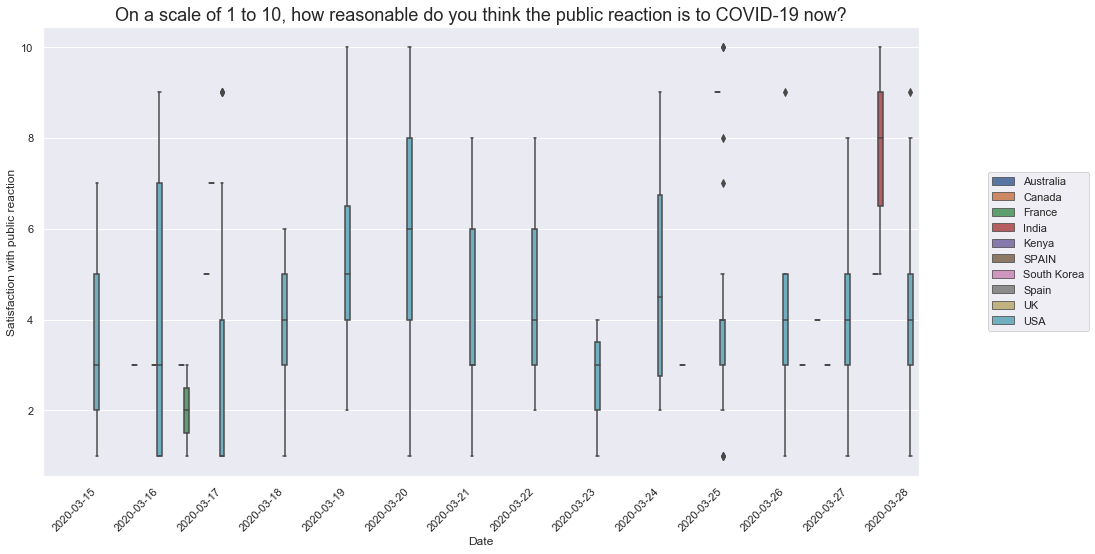

In [93]:
hue_order = survey['Country'].unique().tolist()
hue_order.sort()

with sns.axes_style(style='ticks'):
    sns.set(rc={'figure.figsize':(15.7,8.27)})
    g = sns.boxplot("TimeFinished", 
                    "On a scale of 1 to 10, how reasonable do you think the public reaction is to COVID-19 now? (1 is under-reacting and 10 is overreacting)", 
                    hue="Country", hue_order=hue_order, data=survey.sort_values(by=['TimeFinished']))
    g.set(xlabel='Date', ylabel='Satisfaction with public reaction')
    g.set_title('On a scale of 1 to 10, how reasonable do you think the public reaction is to COVID-19 now?', fontsize=18)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)   
    g.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)

# How much do you trust the government?

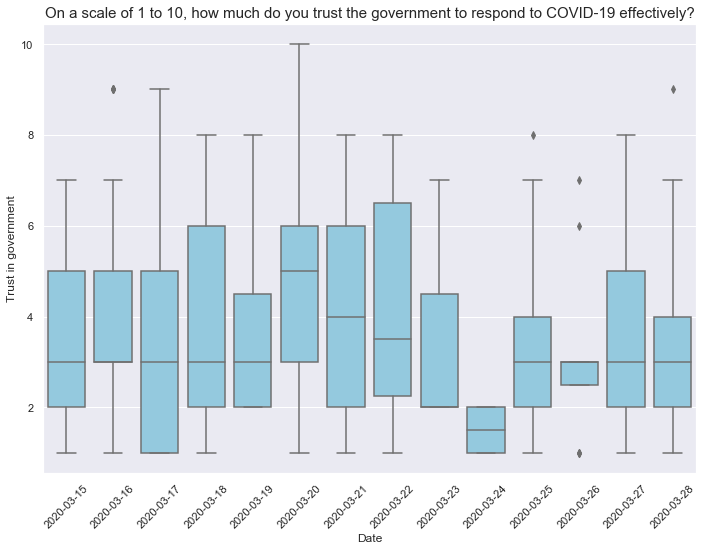

In [98]:
with sns.axes_style(style='ticks'):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    g = sns.boxplot("TimeFinished", 
                    "On a scale of 1 to 10, how much do you trust the government to respond to COVID-19 effectively? (1 is strongly distrust and 10 is strongly trust)", 
                    color="skyblue", data=survey.sort_values(by=['TimeFinished']))
    g.set(xlabel='Date', ylabel='Trust in government')
    g.set_title('On a scale of 1 to 10, how much do you trust the government to respond to COVID-19 effectively?', fontsize=15)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)    

# How much do you trust the government? (by country)

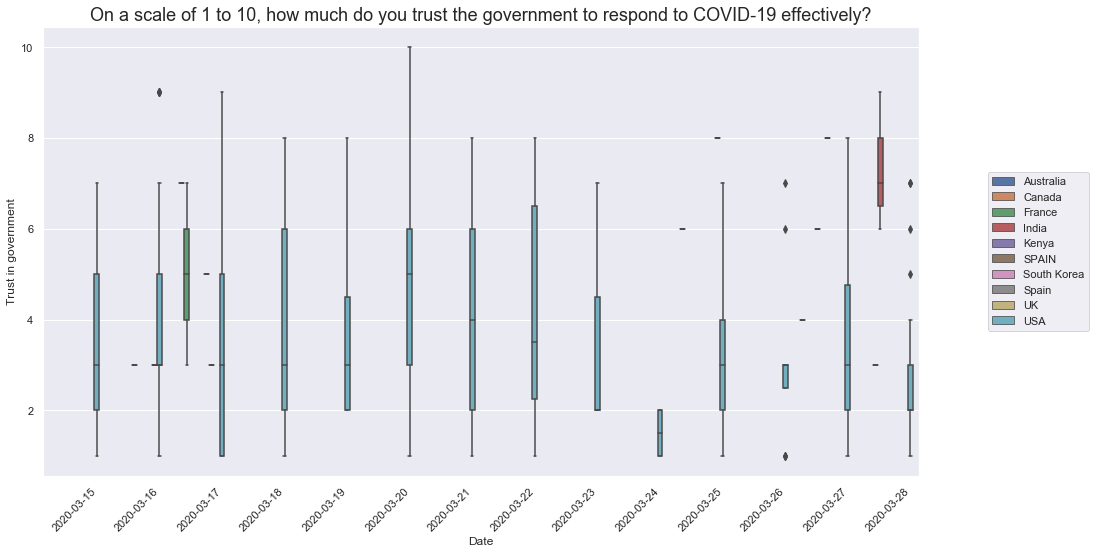

In [99]:
with sns.axes_style(style='ticks'):
    sns.set(rc={'figure.figsize':(15.7,8.27)})
    g = sns.boxplot("TimeFinished", 
                    "On a scale of 1 to 10, how much do you trust the government to respond to COVID-19 effectively? (1 is strongly distrust and 10 is strongly trust)", 
                    hue="Country", hue_order=hue_order, data=survey.sort_values(by=['TimeFinished']))
    g.set(xlabel='Date', ylabel='Trust in government')
    g.set_title('On a scale of 1 to 10, how much do you trust the government to respond to COVID-19 effectively?', fontsize=18)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)   
    g.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)

# How many weeks do you think it'll take before your daily life returns to normal?

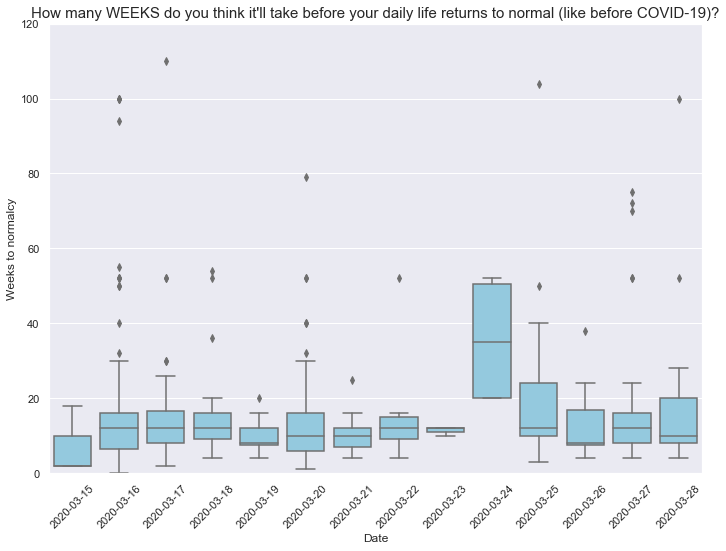

In [104]:
with sns.axes_style(style='ticks'):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    g = sns.boxplot("TimeFinished", 
                    "How many WEEKS do you think it'll take before your daily life returns to normal (like before COVID-19)?", 
                    color="skyblue", data=survey.sort_values(by=['TimeFinished']))
    g.set(xlabel='Date', ylabel='Weeks to normalcy')
    g.set_title("How many WEEKS do you think it'll take before your daily life returns to normal (like before COVID-19)?", fontsize=15)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)   
    g.set_ylim([0, 120])